In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import scipy.io
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import matplotlib.patches as patches
from matplotlib.path import Path
import scipy
from scipy import ndimage
import scipy.misc as im

In [46]:
#given functions:

# Load Dataset
def load_subset(subsets, base_path='data/yaleBfaces'):
    data = []
    label = []
    
    for subset in subsets:
        directory = os.path.join(base_path, "subset" + str(subset))
        files = os.listdir(directory)
        for img in files:
            face = im.imread(os.path.join(directory,img), flatten=True)
            data.append(face)
            label.append(int(img.split('person')[1].split('_')[0]))
    return data, label

# Draw faces
def draw_faces(img_list, col=10):
    fig = plt.figure(figsize = (30,30))
    if len(img_list) < col:
        col = len(img_list)
        row = 1
    else:
        row = int(len(img_list)/col)
    for sub_img in range(1,row*col+1):
        ax = fig.add_subplot(row, col, sub_img)
        ax.imshow(img_list[sub_img-1], cmap='gray')
        ax.axis('off')
    plt.show()

In [47]:
#load training and test face datasets:
train_data,train_labels = load_subset([0],'data/yaleBfaces/')
test1_data,test1_labels = load_subset([1],'data/yaleBfaces/') 
test2_data,test2_labels = load_subset([2],'data/yaleBfaces/') 
test3_data,test3_labels = load_subset([3],'data/yaleBfaces/') 
test4_data,test4_labels = load_subset([4],'data/yaleBfaces/') 


# 1: Naive Recognition / 2: K Nearest Neighbors

In [50]:
#algorithm to predict similar faces:
def k_nearest_neighbors(img, train_set, train_labels, k, o):
    
    #list parallel to test_set containing euclidean distance info
    euclidian = []
    
    #compute l2 norm between input image and all images in test set
    for train_img in train_set:
        euclidian.append(np.linalg.norm(np.reshape(img, (1, 2500)) - np.reshape(train_img, (1, 2500)) ,ord=o))
        #euclidian.append(np.linalg.norm(img - train_img, ord=o))
    
    #make a new data structure so we can sort for top k items:
    pairs = [[train_labels[i], euclidian[i], train_set[i], i] for i in range(len(train_labels))]

    p = sorted(pairs, key=lambda x: x[1])
    
    #get the k predictions for lowest l2 norms
    k_predictions = [p[i][0] for i in range(k)]
    
    #prediction we want to return is the mode of k_predictions
    counter = np.bincount(np.asarray(k_predictions))
    
    if k > 1:
        return np.argmax(counter)
    elif k == 1:
        return np.argmax(counter), p[0][2]

def accuracy(predictions, labels):
    
    #count matches:
    matches = 0.0
    
    for i in range(len(predictions)):
        if predictions[i] == labels[i]:
            matches += 1.0
    
    #compute accuracy
    acc = matches / float(len(predictions))
    return acc, matches, (len(predictions) - matches)

#predict most similar face for entire train set against a test set,
#return list and print relevant stats:
def similar_faces(train, train_labels, test_set, test_labels, k, o):
        
        #list holding predictions for each training image
        if k > 1:
            predictions = [k_nearest_neighbors(img, train, train_labels, k, o) for img in test_set]
        elif k == 1:
            predictions = [k_nearest_neighbors(img, train, train_labels, k, o)[0] for img in test_set]
            predicted_images = [k_nearest_neighbors(img, train, train_labels, k, o)[1] for img in test_set]

        
        #compute and print out accuracy / error info
        a = accuracy(predictions, test_labels)
        print(' test error: ' + str((100*(1-a[0]))) + '%')
        print(' accuracy: ' + str((100*a[0])) + '%', '\n', 'matches: ' + str(a[1]), '\n', 'mismatches: ' + str(a[2]))
        print()
        return predictions
    


In [51]:
#predict faces for each test set for different values of k, report accuracy
print('k = 1:')
pred1 = similar_faces(train_data, train_labels, test1_data, test1_labels, k=1, o=2)
pred2 = similar_faces(train_data, train_labels, test2_data, test2_labels, k=1, o=2)
pred3 = similar_faces(train_data, train_labels, test3_data, test3_labels, k=1, o=2)
pred4 = similar_faces(train_data, train_labels, test4_data, test4_labels, k=1, o=2)

print('k = 3:')
pred1 = similar_faces(train_data, train_labels, test1_data, test1_labels, k=3, o=2)
pred2 = similar_faces(train_data, train_labels, test2_data, test2_labels, k=3, o=2)
pred3 = similar_faces(train_data, train_labels, test3_data, test3_labels, k=3, o=2)
pred4 = similar_faces(train_data, train_labels, test4_data, test4_labels, k=3, o=2)

print('k = 5:')
pred1 = similar_faces(train_data, train_labels, test1_data, test1_labels, k=5, o=2)
pred2 = similar_faces(train_data, train_labels, test2_data, test2_labels, k=5, o=2)
pred3 = similar_faces(train_data, train_labels, test3_data, test3_labels, k=5, o=2)
pred4 = similar_faces(train_data, train_labels, test4_data, test4_labels, k=5, o=2)



k = 1:
 test error: 5.833333333333335%
 accuracy: 94.16666666666667% 
 matches: 113.0 
 mismatches: 7.0

 test error: 48.33333333333333%
 accuracy: 51.66666666666667% 
 matches: 62.0 
 mismatches: 58.0

 test error: 80.71428571428572%
 accuracy: 19.28571428571429% 
 matches: 27.0 
 mismatches: 113.0

 test error: 84.73684210526315%
 accuracy: 15.263157894736842% 
 matches: 29.0 
 mismatches: 161.0

k = 3:
 test error: 5.833333333333335%
 accuracy: 94.16666666666667% 
 matches: 113.0 
 mismatches: 7.0

 test error: 52.5%
 accuracy: 47.5% 
 matches: 57.0 
 mismatches: 63.0

 test error: 82.14285714285714%
 accuracy: 17.857142857142858% 
 matches: 25.0 
 mismatches: 115.0

 test error: 87.89473684210526%
 accuracy: 12.105263157894736% 
 matches: 23.0 
 mismatches: 167.0

k = 5:
 test error: 5.000000000000004%
 accuracy: 95.0% 
 matches: 114.0 
 mismatches: 6.0

 test error: 53.333333333333336%
 accuracy: 46.666666666666664% 
 matches: 56.0 
 mismatches: 64.0

 test error: 82.8571428571428

In [52]:
#predict faces for each test set for different values of k, report accuracy
print('k = 1:')
pred1 = similar_faces(train_data, train_labels, test1_data, test1_labels, k=1, o=1)
pred2 = similar_faces(train_data, train_labels, test2_data, test2_labels, k=1, o=1)
pred3 = similar_faces(train_data, train_labels, test3_data, test3_labels, k=1, o=1)
pred4 = similar_faces(train_data, train_labels, test4_data, test4_labels, k=1, o=1)

print('k = 3:')
pred1 = similar_faces(train_data, train_labels, test1_data, test1_labels, k=3, o=1)
pred2 = similar_faces(train_data, train_labels, test2_data, test2_labels, k=3, o=1)
pred3 = similar_faces(train_data, train_labels, test3_data, test3_labels, k=3, o=1)
pred4 = similar_faces(train_data, train_labels, test4_data, test4_labels, k=3, o=1)

print('k = 5:')
pred1 = similar_faces(train_data, train_labels, test1_data, test1_labels, k=5, o=1)
pred2 = similar_faces(train_data, train_labels, test2_data, test2_labels, k=5, o=1)
pred3 = similar_faces(train_data, train_labels, test3_data, test3_labels, k=5, o=1)
pred4 = similar_faces(train_data, train_labels, test4_data, test4_labels, k=5, o=1)


k = 1:
 test error: 48.33333333333333%
 accuracy: 51.66666666666667% 
 matches: 62.0 
 mismatches: 58.0

 test error: 70.83333333333333%
 accuracy: 29.166666666666668% 
 matches: 35.0 
 mismatches: 85.0

 test error: 65.71428571428571%
 accuracy: 34.285714285714285% 
 matches: 48.0 
 mismatches: 92.0

 test error: 84.21052631578947%
 accuracy: 15.789473684210526% 
 matches: 30.0 
 mismatches: 160.0

k = 3:
 test error: 49.16666666666667%
 accuracy: 50.83333333333333% 
 matches: 61.0 
 mismatches: 59.0

 test error: 71.66666666666667%
 accuracy: 28.333333333333332% 
 matches: 34.0 
 mismatches: 86.0

 test error: 76.42857142857142%
 accuracy: 23.57142857142857% 
 matches: 33.0 
 mismatches: 107.0

 test error: 87.36842105263159%
 accuracy: 12.631578947368421% 
 matches: 24.0 
 mismatches: 166.0

k = 5:
 test error: 51.66666666666666%
 accuracy: 48.333333333333336% 
 matches: 58.0 
 mismatches: 62.0

 test error: 70.83333333333333%
 accuracy: 29.166666666666668% 
 matches: 35.0 
 mismatc

# 3: Recognition Using Eigenfaces

In [71]:
def eigenTrain(train, k):
    
    #make a matrix of vectorized training images:
    vectorized_data = [np.reshape(train_img, (1, len(train_img)*len(train_img[0]))) for train_img in train]
    vdt = np.transpose(vectorized_data)
    
    #compute the mean for each column of the vectorized_data matrix
    vec_means = [(sum(row)/len(row)) for row in vdt]
    
    #subtract each cell in vectorized_data matrix by the global mean:
    for i in range(len(vdt)):
        for j in range(len(vdt[i])):
            vdt[i][j] = vdt[i][j] - vec_means[j]
    
    vectorized_data = np.transpose(vdt)
    
    #perform singular value decomposition on vectorized data matrix:
    u, s, v_trans = np.linalg.svd(vectorized_data)
    
    #get top k rows of v:
    top_k = v_trans[:k]
    
    return top_k, vec_means

def stackImages(eigen_data):
    
    #make a list of 50 x 50 images for each row in eigen_data
    reshaped = [np.reshape(row[0], (50, 50)) for row in eigen_data]
    
    #hstack and vstack until we have a nice image to show:
    img_1 = np.hstack(reshaped[:int(len(eigen_data)/2)])
    img_2 = np.hstack(reshaped[int(len(eigen_data)/2):])
    #img_1 = np.hstack(reshaped[:10])
    #img_2 = np.hstack(reshaped[10:])
    img_stack = np.vstack((img_1, img_2))
    
    fig, ax = plt.subplots(figsize=(36, 4))
    ax.imshow(img_stack, cmap='gray')
    
    

In [63]:
e = eigenTrain(train_data, k=20)



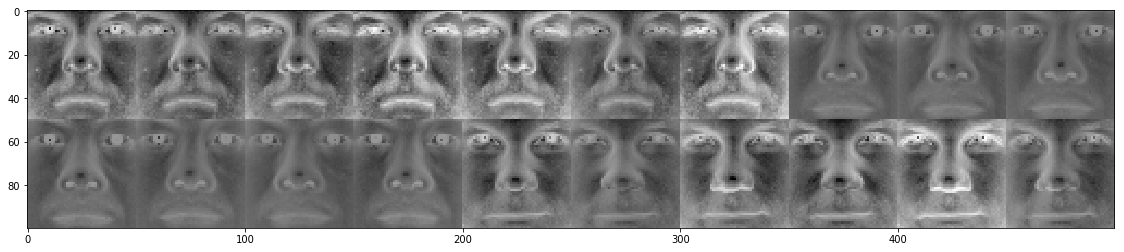

In [72]:
stackImages(e[0])



In [65]:
e_10 = eigenTrain(train_data, k=10)

